In [146]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# make sure you don't hog all the video memory
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)
###################################

from keras.layers import Input, Dense, Conv1D, Conv3D, MaxPooling1D, MaxPooling3D, SeparableConv1D, Dropout, BatchNormalization, Flatten, ELU, Activation
from keras.models import Model
from keras.models import load_model
from keras.callbacks import TensorBoard, EarlyStopping
from keras import optimizers
from keras.initializers import Orthogonal as orth

import numpy as np
import matplotlib.pyplot as plt

In [9]:
# file = 'EEG_big.mat'
# file = 'EEG_big4CNN.mat'
# file = 'EEG_big4CNN_1subj.mat'
# file = 'KOS_100Hz_noICA->0.5-38Hz,Env=1.mat'
# file = 'Merged123->0.5-38Hz,Env=1.mat'

# file = 'KOS_100Hz_ICA->0.5-38Hz,Env=1.mat')
# file = 'Merged123->1-48Hz,Env=1.mat'

# file = 'BCI_TD.mat'

# file = 'BCI_0101T_TD.mat'
# file = 'BCI_0202T_TD.mat'
# file = 'BCI_0303T_TD.mat'
# file = 'BCI_0403T_TD.mat'
# file = 'BCI_0503T_TD.mat'
# file = 'BCI_0603T_TD.mat'
# file = 'BCI_0703T_TD.mat'
# file = 'BCI_0801T_TD.mat'

# file = 'BCI_FD.mat'

# file = 'ks.mat'
# file = 'ks_FD.mat'
# file = 'ks_2TD.mat'
# file = 'ksenia2_long_chunked.mat'

# file = 'BCI_FD_fullspectrum.mat'
# file = 'BCI_FD_lowspectrum.mat'
# file = 'KOS_100Hz_ICA->1-38Hz,Env=1_FD.mat'
# file = 'Merged123->1-100Hz,Env=1_FD'
# file = 'Merged123->1-47Hz,Env=1_FD.mat'
# file = 'Merged123->15-47Hz,Env=1_TD.mat'
# file = 'Merged123->15-47Hz,Env=1_TD5_64_.mat'
# file = 'Merged123->75-134Hz,Env=1_TD.mat'
# file = 'Merged123->2-30Hz,Env=1_TD5_64_.mat'

# file = 'Merged456->2-30Hz,Env=1_TD1_94_.mat'                # 0.71
# file = 'Merged456->2-30Hz,Env=1_TD101_192_.mat'             # 0.60
# file = 'Merged456->2-30Hz,Env=1_TD197_289_.mat'             # 0.85

# file = 'DAS_1_ica.mat, DS2=200Hz, FIR=1-60Hz, centnorm=1, Env=1, ICA, 1-124.mat' # 0.53 
# file = 'Merged456_197-298_protocol_1.set, DS2=250Hz, FIR=1-47Hz, centnorm=0, Env=0, ICA, 1-95.mat'
# file = 'Merged456_197-298_protocol_1.set, DS2=250Hz, FIR=1-47Hz, centnorm=0, Env=0, NOICA, 1-95.mat'



# file = 'DAS_CH.mat, DS2=250Hz, FIR=1-30Hz, centnorm=1, Env=1, TD, 1-124.mat' # 0.65
# file = 'DAS_CH.mat, DS2=250Hz, FIR=1-38Hz, centnorm=1, Env=1, TD, 1-124.mat'
# file = 'DAS_CH.mat, DS2=250Hz, FIR=1-47Hz, centnorm=1, Env=1, TD, 1-124.mat'   # 0.60

# file = 'Merged123_1_64_ICA(-eyes)AUDpreproc.mat, DS2=64Hz, FIR=1-9Hz, centnorm=1, Env=1, TD, 1-90.mat'
# file = 'Merged123_1_64_ICA(-eyes)AUDpreproc.mat, DS2=250Hz, FIR=2-30Hz, centnorm=1, Env=1, TD, 1-90.mat' # 0.61
# file = 'Merged123_1_64_ICA(-eyes)AUDpreproc.mat, DS2=250Hz, FIR=2-30Hz, centnorm=1, step=1, win=2, TD, 1-90.mat' #0.61

# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=250Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-93.mat' # 0.76
# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-93.mat'

# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=4, TD, 1-93.mat' #0.7
# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TD, 1-93.mat' #0.60
# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-93.mat' #0.75(unstable)

file = 'Merged456-197-289_ICA(ANDeyes)+AUDpreproc.mat, DS2=64Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-93.mat' #0.86
# file = 'Merged456-197-289_ICA(ANDeyes)+AUDpreproc.mat, DS2=250Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-93.mat' #0.89

# file = 'Merged456-1-94_ICA(-2,3ICs)+AUDpreproc.mat, DS2=64Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-95.mat' #0.65
# file = 'EEG_ICA(-123_ICs)+proc_AUD_101_192_Merged456.mat, DS2=64Hz, FIR=2-30Hz, centnorm=1, step=2, win=2, TD, 1-92.mat' #0.59

# file = 'NeoRec_2018-05-08_21-47-10+ICA(-IC1)preproc_aud.mat, DS2=64Hz, FIR=1-40Hz, centnorm=1, Env=1, TD, 1-123.mat' # 0.63
# file = 'NeoRec_2018-05-08_21-47-10+ICA.mat, DS2=64Hz, FIR=1-40Hz, centnorm=1, Env=1, TD, 1-123.mat'
# file = 'NeoRec_2018-05-08_16-52-10_-eyes.mat, DS2=64Hz, FIR=1-40Hz, centnorm=1, Env=1, TD, 1-124.mat' 
# file = 'NeoRec_2018-05-08_16-52-10_-eyes.mat, DS2=128Hz, FIR=1-40Hz, centnorm=1, Env=1, TD, 1-124.mat'
# file = 'NeoRec_2018-05-08_16-52-10.mat, DS2=64Hz, FIR=1-40Hz, centnorm=1, Env=1, TD, 1-124.mat'

SHUFFLE = False
TEST_TRAIN = 0.25


In [10]:
# get the Dataset:
path = '/home/amplifier/home/DATASETS/' + file
mat_contents = sio.loadmat(path)
X = mat_contents['X']
Y = mat_contents['Z']

if X.shape[1]<X.shape[2]:
    X = np.transpose(X,[0,2,1])

if Y.shape[1] > Y.shape[0]:
    Y = Y.T
    
print('Original data shape:', X.shape)
print('Original labels shape:', Y.shape)

# verify that the model REALLY finds a mapping between the input and the labels. If we get
# our accuracy by chance, then we should get the same accuracy on a permuted dataset:
# Y = np.random.permutation(Y)


# winsize = mat_contents['winsize']
# stepsize = mat_contents['stepsize']
# trial_len = mat_contents['trial_len']
# low_cutoff = mat_contents['low_cutoff']
# high_cutoff = mat_contents['high_cutoff']
# source = mat_contents['filein']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_TRAIN, shuffle=SHUFFLE)
print('Original data type:', x_train.dtype)

# convert to float64 for numerical stability:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

# one hot encode the labels:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)

# convert to float16 to save space:
x_train = x_train.astype('float16')
y_train = y_train.astype('float16')
x_test = x_test.astype('float16')
y_test = y_test.astype('float16')
print('Normalized data type:', x_train.dtype)

leng = X.shape[1] # if you work in the FD, this is the height of the sample time-frequency image, othewise EEG channels
chan = X.shape[2] # if you work in the FD, this is the width of the sample time-frequency image, othewise time samples of EEG signal

if len(X.shape)==3:
    streams = 1 # this is EEG channels if you work with frequency domain, in the TD streams = 1
if len(X.shape)==4:
    streams = X.shape[3] # this is EEG channels if you work with frequency domain, in the TD streams = 1


print('test input shape', x_test.shape, "Nomralized MEAN:", np.mean(x_test), "min", np.min(x_test),"max", np.max(x_test))
print('train input shape', x_train.shape, "Nomralized MEAN:", np.mean(x_train), "min", np.min(x_train),"max", np.max(x_train))

print('test labels shape', y_test.shape, "Nomralized MEAN:", np.mean(y_test), "min", np.min(y_test),"max", np.max(y_test))
print('train labels shape', y_train.shape, "Nomralized MEAN:", np.mean(y_train), "min", np.min(y_train),"max", np.max(y_train))

# print('Window length', winsize)
# print('Step size:', stepsize)
# print('Trial length:', trial_len)

Original data shape: (450, 128, 60)
Original labels shape: (450, 1)
Original data type: float32
Normalized data type: float16
test input shape (113, 128, 60) Nomralized MEAN: 0.00010717 min -4.77 max 4.902
train input shape (337, 128, 60) Nomralized MEAN: 6.21e-05 min -10.18 max 8.86
test labels shape (113, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0
train labels shape (337, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0


In [91]:
path = '/home/amplifier/home/DATASETS/'
# file = 'cm.mat'
file = 'cm_alt.mat'

mat_contents = sio.loadmat(path+file)
cm = mat_contents['cm']


In [169]:
x_train_rs = np.zeros([x_train.shape[0],6,7,x_train.shape[1]])
tst = np.zeros([6,7])
for k in range(x_train.shape[0]):
    for i in range(2,8):
        for j in range(2,9):
            if (cm[i,j] != 0) & (cm[i,j]<=x_train.shape[2]):
                tst[i-2,j-2] = cm[i,j]
#                 print('RIGHT', cm[i,j])
                x_train_rs[k, i-2,j-2,:] = x_train[k,:,cm[i,j]-1]
#                 print('Trial', k,':', 'Moving EEG chan', cm[i,j], '(', cm[i,j]-1, 'x_train in matrix)', 'to', i-1, 'th', j-2, 'th matrix x_train_rs')
#             else:
#                 print('NO', cm[i,j])


x_train_rs = x_train_rs[:,:,:,:,None]
print(x_train_rs.shape)

x_test_rs = np.zeros([x_test.shape[0], 6,7,x_test.shape[1]])
tst = np.zeros([6,7])
for k in range(x_test.shape[0]):
    for i in range(2,8):
        for j in range(2,9):
            if (cm[i,j] != 0) & (cm[i,j]<=x_test.shape[2]):
                tst[i-2,j-2] = cm[i,j]
#                 print('RIGHT', cm[i,j])
                x_test_rs[k, i-2,j-2,:] = x_test[k,:,cm[i,j]-1]
#                 print('Trial', k,':', 'Moving EEG chan', cm[i,j], '(', cm[i,j]-1, 'x_train in matrix)', 'to', i-1, 'th', j-2, 'th matrix x_train_rs')
#             else:
#                 print('NO', cm[i,j])



x_test_rs = x_test_rs[:,:,:,:,None]

print(x_test_rs.shape)

(337, 6, 7, 128, 1)
(113, 6, 7, 128, 1)


Text(0.5,1,'17')

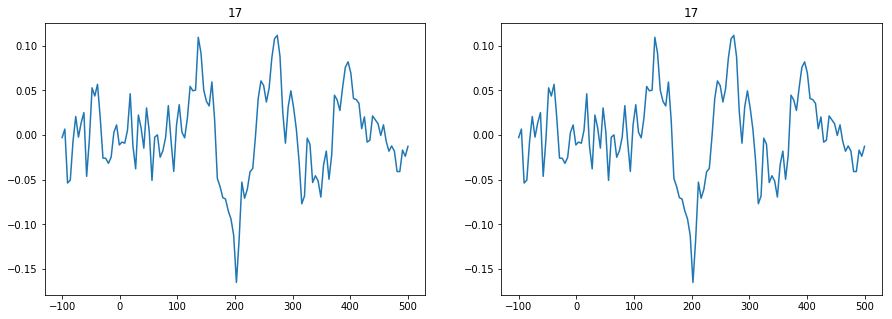

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(-100, 500, 128)
fig, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
tmp = np.mean(x_train_rs, axis=0)
plt.plot(t, tmp[2,3,:])
plt.title(tst[2,3].astype('int8'))

plt.subplot(122)
plt.plot(t, np.mean(x_train[:,:,16], axis=0))
plt.title('17')

In [173]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def pltsin(f):
    t = np.linspace(-100, 500, 128)
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    plt.subplot(121)
    plt.imshow(tmp[:,:,f,-1], vmin=-0.2, vmax=0.2)
    plt.subplot(122)
    plt.plot(t, tmp[2,3,:,-1])
    plt.axvline(x=t[f])
    plt.axhline(y=0)
    plt.show
    
x = interact(pltsin, f=(0,127,1))

interactive(children=(IntSlider(value=63, description='f', max=127), Output()), _dom_classes=('widget-interact…

In [174]:
print(x_train_rs.shape)
height, width, depth = x_train_rs.shape[1],x_train_rs.shape[2],x_train_rs.shape[3]

(337, 6, 7, 128, 1)


In [219]:
def activation():
    return ELU(alpha=1.0) # Activation('relu') #

def conv_net(height, width, depth):
    input_img = Input(shape=(height, width, depth, 1))  # adapt this if using `channels_first` image
    
    block1 = Conv3D(50, (3,3,50), padding='same', activation=None)(input_img)
    block1 = activation()(block1)
    block1 = MaxPooling3D(pool_size=(2,2,2), strides=None, padding='same')(block1)
    block1 = BatchNormalization()(block1)
    block1 = Dropout(0.1)(block1)
    
    block2 = Conv3D(100, (2,2,20), padding='same', activation=None)(block1)
    block2 = activation()(block2)
    block2 = MaxPooling3D(pool_size=(2,2,2), strides=None, padding='same')(block2)
    block2 = BatchNormalization()(block2)
    block2 = Dropout(0.2)(block2)
    
    block6 = Flatten()(block2)
    block6 = Dense(20, activation='sigmoid')(block6)
    block6 = BatchNormalization()(block6)
    block6 = Dropout(0.5)(block6)

    block7 = Dense(2, activation='softmax')(block6)

    return Model(input_img, block7)

In [220]:
# define input to the model:
x = Input(shape=(height, width, depth, 1))

# make the model:
model = conv_net(height, width, depth)

# compile the model:
# sgd = optimizers.SGD(lr=0.01, decay=1e-4, momentum=0.95, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss=correlation_coefficient_loss)
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(0.00001), metrics=["accuracy"])


# SEE INSIDE THE MODEL:
# conv_net().summary() #or
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 6, 7, 128, 1)      0         
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 6, 7, 128, 50)     22550     
_________________________________________________________________
elu_21 (ELU)                 (None, 6, 7, 128, 50)     0         
_________________________________________________________________
max_pooling3d_20 (MaxPooling (None, 3, 4, 64, 50)      0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 3, 4, 64, 50)      200       
_________________________________________________________________
dropout_34 (Dropout)         (None, 3, 4, 64, 50)      0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 3, 4, 64, 100)     400100    
__________

In [221]:
init_lr = 0.000025
lr_drop_by = 0.995
drop_every = 5
BATCH_SIZE = 10

from keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler, Callback, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min')

K.set_value(model.optimizer.lr, init_lr)

def step_decay(epoch, init_lr=init_lr, lr_drop=lr_drop_by, drop_every=drop_every):
    if epoch%drop_every==0:
        lrate = init_lr * (lr_drop_by ** np.floor((1+epoch)/drop_every))
    else:
        lrate = K.get_value(model.optimizer.lr)
    print('CHECK', epoch%drop_every)
    return lrate

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        self.batch_loss = []
        self.val_acc = []
 
    def on_epoch_end(self, epoch, batch, logs={}):
        lrate = step_decay(epoch)
        txt = K.get_value(model.optimizer.lr)
        self.lr.append(txt)
#         self.lr.append(lrate)
#         txt = K.eval(self.model.optimizer.lr)
        print('OPTIMIZERS lrate AT EPOCH END = ', txt, '\n\n')
    
    def on_epoch_begin(self, epoch, batch, logs={}):
        txt = K.get_value(model.optimizer.lr)
        print('OPTIMIZERS lrate AT EPOCH START = ', txt)

    def on_batch_end(self, batch, logs={}):
        self.batch_loss.append(logs.get('loss'))

lr_decay = LearningRateScheduler(schedule=step_decay)
loss_history = LossHistory()

checkpointer = ModelCheckpoint(filepath='/home/amplifier/home/NEW_DL/weights/3D_conv_TOPO_wts.h5',
                               verbose=1,
                               monitor='val_acc',
                               save_best_only=True)


train_history = model.fit(x_train_rs, y_train,
                epochs=1000,
                batch_size=BATCH_SIZE,
                verbose=2,
                shuffle=True,
                validation_data=(x_test_rs, y_test),
                callbacks=[checkpointer, early_stopping, lr_decay, loss_history])

# save the entire model and the weights after the training:
# model.save('/home/amplifier/home/NEW_DL/models/EEGnet_CNN_Dense_Binary_Classifier_TD_1D.h5')
# model.save_weights('/home/amplifier/home/NEW_DL/weights/EEGnet_CNN_Dense_Binary_Classifier_TD_1D_wts.h5')

Train on 337 samples, validate on 113 samples
Epoch 1/1000
CHECK 0
OPTIMIZERS lrate AT EPOCH START =  2.5e-05
 - 3s - loss: 1.3669 - acc: 0.5282 - val_loss: 0.8753 - val_acc: 0.5841

Epoch 00001: val_acc improved from -inf to 0.58407, saving model to /home/amplifier/home/NEW_DL/weights/3D_conv_TOPO_wts.h5
CHECK 0
OPTIMIZERS lrate AT EPOCH END =  2.5e-05 


Epoch 2/1000
CHECK 1
OPTIMIZERS lrate AT EPOCH START =  2.5e-05
 - 1s - loss: 1.2839 - acc: 0.5134 - val_loss: 0.9128 - val_acc: 0.5310

Epoch 00002: val_acc did not improve from 0.58407
CHECK 1
OPTIMIZERS lrate AT EPOCH END =  2.5e-05 


Epoch 3/1000
CHECK 2
OPTIMIZERS lrate AT EPOCH START =  2.5e-05
 - 1s - loss: 1.0748 - acc: 0.5668 - val_loss: 0.8792 - val_acc: 0.5575

Epoch 00003: val_acc did not improve from 0.58407
CHECK 2
OPTIMIZERS lrate AT EPOCH END =  2.5e-05 


Epoch 4/1000
CHECK 3
OPTIMIZERS lrate AT EPOCH START =  2.5e-05
 - 1s - loss: 0.9621 - acc: 0.6439 - val_loss: 0.7814 - val_acc: 0.5929

Epoch 00004: val_acc impro

 - 1s - loss: 0.1820 - acc: 0.9199 - val_loss: 0.7995 - val_acc: 0.6372

Epoch 00032: val_acc did not improve from 0.68142
CHECK 1
OPTIMIZERS lrate AT EPOCH END =  2.2502187e-05 


Epoch 33/1000
CHECK 2
OPTIMIZERS lrate AT EPOCH START =  2.2502187e-05
 - 1s - loss: 0.2045 - acc: 0.9228 - val_loss: 0.8235 - val_acc: 0.5929

Epoch 00033: val_acc did not improve from 0.68142
CHECK 2
OPTIMIZERS lrate AT EPOCH END =  2.2502187e-05 


Epoch 34/1000
CHECK 3
OPTIMIZERS lrate AT EPOCH START =  2.2502187e-05
 - 1s - loss: 0.2153 - acc: 0.9110 - val_loss: 0.7664 - val_acc: 0.6106

Epoch 00034: val_acc did not improve from 0.68142
CHECK 3
OPTIMIZERS lrate AT EPOCH END =  2.2502187e-05 


Epoch 35/1000
CHECK 4
OPTIMIZERS lrate AT EPOCH START =  2.2502187e-05
 - 1s - loss: 0.2080 - acc: 0.9169 - val_loss: 0.8404 - val_acc: 0.6018

Epoch 00035: val_acc did not improve from 0.68142
CHECK 4
OPTIMIZERS lrate AT EPOCH END =  2.2502187e-05 


Epoch 36/1000
CHECK 0
OPTIMIZERS lrate AT EPOCH START =  2.1726


Epoch 00064: val_acc did not improve from 0.70796
CHECK 3
OPTIMIZERS lrate AT EPOCH END =  1.6909873e-05 


Epoch 65/1000
CHECK 4
OPTIMIZERS lrate AT EPOCH START =  1.6909873e-05
 - 1s - loss: 0.0928 - acc: 0.9703 - val_loss: 0.8042 - val_acc: 0.6283

Epoch 00065: val_acc did not improve from 0.70796
CHECK 4
OPTIMIZERS lrate AT EPOCH END =  1.6909873e-05 


Epoch 66/1000
CHECK 0
OPTIMIZERS lrate AT EPOCH START =  1.5843108e-05
 - 1s - loss: 0.0956 - acc: 0.9585 - val_loss: 0.7925 - val_acc: 0.6637

Epoch 00066: val_acc did not improve from 0.70796
CHECK 0
OPTIMIZERS lrate AT EPOCH END =  1.5843108e-05 


Epoch 67/1000
CHECK 1
OPTIMIZERS lrate AT EPOCH START =  1.5843108e-05
 - 1s - loss: 0.1220 - acc: 0.9585 - val_loss: 0.7450 - val_acc: 0.6549

Epoch 00067: val_acc did not improve from 0.70796
CHECK 1
OPTIMIZERS lrate AT EPOCH END =  1.5843108e-05 


Epoch 68/1000
CHECK 2
OPTIMIZERS lrate AT EPOCH START =  1.5843108e-05
 - 1s - loss: 0.0770 - acc: 0.9763 - val_loss: 0.7957 - val_acc:

 - 1s - loss: 0.0600 - acc: 0.9703 - val_loss: 0.8848 - val_acc: 0.6372

Epoch 00097: val_acc did not improve from 0.70796
CHECK 1
OPTIMIZERS lrate AT EPOCH END =  9.645513e-06 


Epoch 98/1000
CHECK 2
OPTIMIZERS lrate AT EPOCH START =  9.645513e-06
 - 1s - loss: 0.0602 - acc: 0.9703 - val_loss: 0.8906 - val_acc: 0.6460

Epoch 00098: val_acc did not improve from 0.70796
CHECK 2
OPTIMIZERS lrate AT EPOCH END =  9.645513e-06 


Epoch 99/1000
CHECK 3
OPTIMIZERS lrate AT EPOCH START =  9.645513e-06
 - 1s - loss: 0.0584 - acc: 0.9881 - val_loss: 0.8151 - val_acc: 0.6372

Epoch 00099: val_acc did not improve from 0.70796
CHECK 3
OPTIMIZERS lrate AT EPOCH END =  9.645513e-06 


Epoch 100/1000
CHECK 4
OPTIMIZERS lrate AT EPOCH START =  9.645513e-06
 - 1s - loss: 0.0541 - acc: 0.9881 - val_loss: 0.8469 - val_acc: 0.6372

Epoch 00100: val_acc did not improve from 0.70796
CHECK 4
OPTIMIZERS lrate AT EPOCH END =  9.645513e-06 


Epoch 101/1000
CHECK 0
OPTIMIZERS lrate AT EPOCH START =  8.725432e-0

In [222]:
model.load_weights('/home/amplifier/home/NEW_DL/weights/3D_conv_TOPO_wts.h5')
# let's predict a TRAINING sammple:
decoded_train = model.predict(x_train_rs)
decoded_test = model.predict(x_test_rs)
print(decoded_train.shape)
print(decoded_test.shape)

(337, 2)
(113, 2)


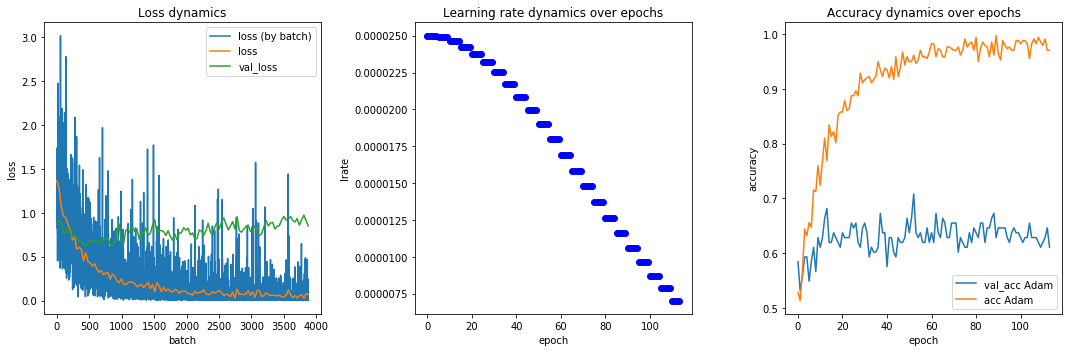

In [223]:
f, axs = plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
plt.plot(loss_history.batch_loss)
tic = np.linspace(0, len(loss_history.batch_loss), len(train_history.history['val_loss']))
plt.plot(tic, train_history.history['loss'])
plt.plot(tic, train_history.history['val_loss'])
plt.title('Loss dynamics')
plt.ylabel('loss')
plt.xlabel('batch')
plt.legend(['loss (by batch)', 'loss', 'val_loss'])

plt.subplot(132)
plt.plot(loss_history.lr,'bo')
plt.title('Learning rate dynamics over epochs')
plt.ylabel('lrate')
plt.xlabel('epoch')

asa = []
optimizer_name = model.optimizer.__class__.__name__
plt.subplot(133)
plt.plot(train_history.history['val_acc'])
plt.plot(train_history.history['acc'])
asa.append('val_acc ' + optimizer_name)
asa.append('acc ' + optimizer_name)
plt.title('Accuracy dynamics over epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(asa)

plt.tight_layout()